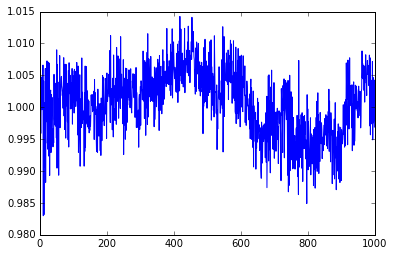

In [74]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import ndimage
from glob import glob
from scipy.signal import fftconvolve

#Number of Frames Captures
frames = 1000

#Number of Samples Taken
samples = 3

#create ACF Array
acf = np.empty((samples,frames))

for k in range(1,samples+1):
    #Parse Filelist
    filelist = glob('12.15.16/pbs/{0}/pbs {0}_*.tif'.format(k))
    filelist.sort()
    
    #Initial Image
    t_o = ndimage.imread(filelist[0])
    
    #Initial Autocorrelation Value
    acf_o = np.sum(fftconvolve(t_o,t_o))
    
    for i in range(0,frames):
        #Read in Image
        f = ndimage.imread(filelist[i]).astype(float)
        
        #Convolve Images
        temp = fftconvolve(t_o,f)
        
        #Calculate ACF Value
        acf[k-1,i] = acf_o/np.sum(temp)

#Average ACF Functions
acf_pbs = np.empty(frames)
for d in range(0,frames):
    acf_pbs[d] = np.average([acf[0,d],acf[1,d],acf[2,d]])
    
plt.plot(acf_pbs)

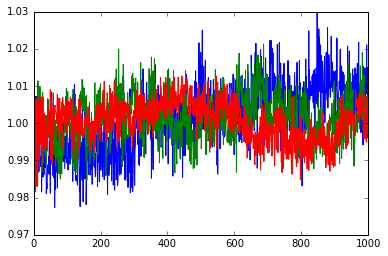

In [91]:
plt.plot(acf_100nm)
plt.plot(acf_50nm)
#plt.plot(acf_glass)
plt.plot(acf_pbs)

In [32]:
acf_100_nm = np.empty(500)
acf_100_nm = acf
#acf_glass = np.empty(500)
#acf_50nm_3 = acf
#plt.plot(acf_50nm_1)
#plt.plot(acf_50nm_2)
#plt.plot(acf_50nm_3)
#plt.plot(acf_glass_1)
#plt.plot(acf_glass_2)
#plt.plot(acf_glass_3)

#for i in range(0,500):
    
#    acf_50nm[i] = np.average([acf_50nm_1[i],acf_50nm_2[i],acf_50nm_3[i]])
#    acf_glass[i] = np.average([acf_glass_1[i],acf_glass_2[i],acf_glass_3[i]])

(0.9, 1.1)

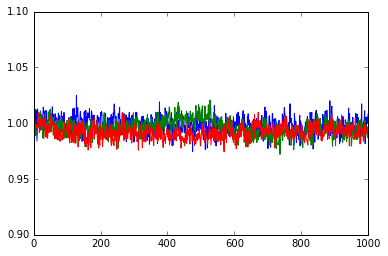

In [35]:
#plt.plot(acf_50nm)
#plt.plot(acf_glass)
plt.plot(acf_50_nm)
plt.plot(acf_100_nm)
plt.plot(acf)
plt.ylim((0.9,1.1))